# [Atividade Computacional 6](http://mtm.ufsc.br/~douglas/2025.1/MTM410024_MTM3523/Atividade6.pdf)

In [1]:
using LinearAlgebra
using Plots
using Random
using SparseArrays
using DataFrames

## Algoritmos Iterativos

Nos algoritmos abaixo, eu quebrei a função que implementa o algoritmo em duas:

 - Uma função será o passo do algoritmo: ela implementará **uma** iteração do algoritmo, mudando o valor das variáveis _in place_, daí a notação `!` no final do nome da função;
 - A função principal do algoritmo, com a inicialização, verificação de convergência, registro dos resíduos e tudo mais.


Em ambas, retornarei uma dupla contendo a solução encontrada e uma _named tuple_ com as informações de execução.

### Gauss-Seidel


In [2]:
function passoGS!(M,r,x)
  # Aqui utilizamos a versão x^{k+1} = x^{k} + M^{-1}r_k
  y = M\r
  x .= x + y
end

function GaussSeidel(A,b,x0; maxiter=1000,tol=1e-10)
  # Inicialização
  x = copy(x0)
  M = LowerTriangular(A)
  residuos = zeros(maxiter)
  for k=1:maxiter
    # Verifica convergência
    r = b-A*x
    res = norm(r)
    residuos[k] = res
    if res < tol
      return x, (passos=k-1, historico=residuos, residuo=res, convergiu=true)
    end
    # se não convergiu, faz um passo do algoritmo
    passoGS!(M,r,x)
  end
  return  x, (passos=maxiter, historico=residuos, residuo=norm(A*x-b), convergiu=false)
end

GaussSeidel (generic function with 1 method)

### Gradientes conjugados

In [3]:
function passoGC!(A,r,d,x)
  # Valores que serão usados repetidamente
  Ad = A*d
  rTd = r'd
  rTr = r'r
  α = -rTd/(d'Ad)
  # Utilizando o .= para alterar os vetores in place
  x .= x + α*d
  r .= r + α*Ad
  β = r'r/rTr
  d .= -r + β*d
end

function GradienteConjugados(A,b,x0;maxiter=1000,tol=1e-10)
  # Inicialização
  x = copy(x0)
  r = A*x-b
  d = -r
  residuos = zeros(maxiter)
  for k=1:maxiter
    # Verifica convergência
    res = norm(r)
    residuos[k] = res
    if res < tol
      return x, (passos=k-1, historico=residuos, residuo=res, convergiu=true)
    end
    # se não convergiu, faz um passo do algoritmo
    passoGC!(A,r,d,x)
  end
  return x, (passos=maxiter, historico=residuos, residuo=norm(A*x-b), convergiu=false)
end



GradienteConjugados (generic function with 1 method)

Vamos chamar essas funções em um exemplo genérico para que `julia` pré-compile elas.

In [4]:
n = 300
A = rand(n,n) + n*I
xs = ones(n)
b = A*xs
x0 = zeros(n)

xGS, infoGS = GaussSeidel(A,b,x0)
xGC, infoGC = GradienteConjugados(A,b,x0);

print("""
Iterações Gauss-Seidel: $(infoGS.passos)
Iterações Gradientes Conjugados: $(infoGC.passos)
""")

Iterações Gauss-Seidel: 15
Iterações Gradientes Conjugados: 13


## Criando a matriz $A$

In [5]:
T(n) = sparse(Tridiagonal(ones(n-1), 4*ones(n), ones(n-1)))

function matrizproblema(n,m)
  D = blockdiag([ T(n) for i=1:m]...)
  menosuns = spdiagm( -n => -ones(n*(m-1)), n => -ones(n*(m-1)))
  D + menosuns
end

matrizproblema (generic function with 1 method)

## Problemas

In [6]:
# Funções que encapsulam o processo de plotar o gráfico dos resíduos

function plotar_residuos(info, label)
  dados = [x for x in info.historico if x > 0]
  range  = 1:length(dados)
  plot(range,dados, yscale=:log10, label=label)
end

function plotar_residuos!(info, label)
  dados = [x for x in info.historico if x > 0]
  range  = 1:length(dados)
  plot!(range,dados, yscale=:log10, label=label)
end

gr()

Plots.GRBackend()

### $n=10$

In [7]:
m = 10
n = 10
A = matrizproblema(n,m)
xs = ones(n*m);
x0 = zeros(n*m);
b = A*xs;

In [8]:
tempoGS1 = @elapsed xGS1, infoGS1 = GaussSeidel(A,b,x0;tol=1e-8);
infoGS1.passos

184

In [9]:
tempoGC1 = @elapsed xGC1, infoGC1 = GradienteConjugados(A,b,x0; tol=1e-8);
infoGC1.passos

20

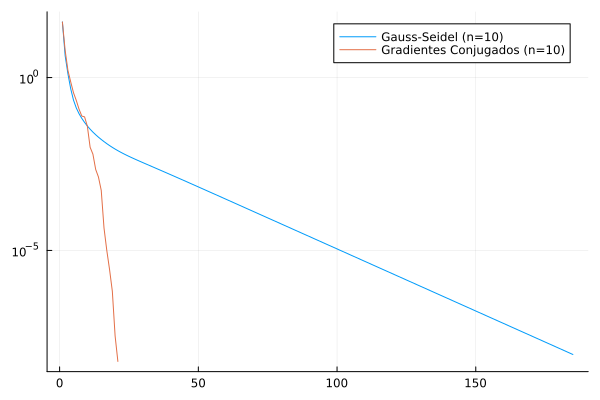

In [10]:
plotar_residuos(infoGS1, "Gauss-Seidel (n=10)")
plotar_residuos!(infoGC1, "Gradientes Conjugados (n=10)")

### $n=100$

In [ ]:
m = 10
n = 100
A = matrizproblema(n,m)
xs = ones(n*m);
x0 = zeros(n*m);
b = A*xs;

In [ ]:
tempoGS2 = @elapsed xGS2, infoGS2 = GaussSeidel(A,b,x0;tol=1e-8);
infoGS2.passos

292

In [ ]:
tempoGC2 = @elapsed xGC2, infoGC2 = GradienteConjugados(A,b,x0; tol=1e-8);
infoGC2.passos

75

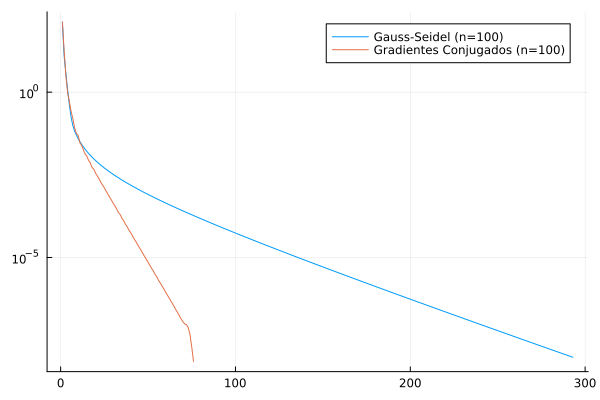

In [ ]:
plotar_residuos(infoGS2,"Gauss-Seidel (n=100)")
plotar_residuos!(infoGC2,"Gradientes Conjugados (n=100)")

### $n=1000$

In [ ]:
m = 10
n = 1000
A = matrizproblema(n,m)
xs = ones(n*m);
x0 = zeros(n*m);
b = A*xs;

In [ ]:
tempoGS3 = @elapsed xGS3, infoGS3 = GaussSeidel(A,b,x0;tol=1e-8);
infoGS3.passos

292

In [ ]:
tempoGC3 = @elapsed xGC3, infoGC3 = GradienteConjugados(A,b,x0; tol=1e-8);
infoGC3.passos

81

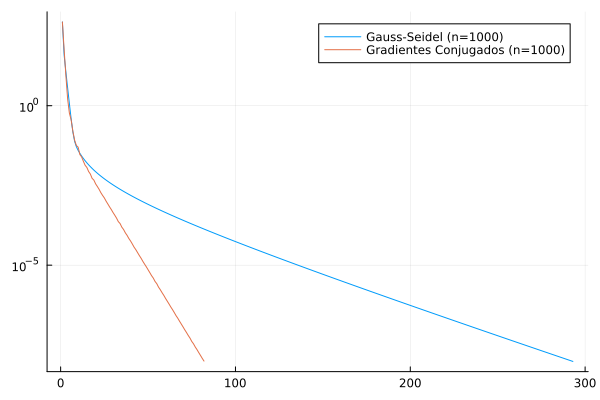

In [ ]:
plotar_residuos(infoGS3, "Gauss-Seidel (n=1000)")
plotar_residuos!(infoGC3, "Gradientes Conjugados (n=1000)")

## Análise dos Métodos

In [ ]:
dados = DataFrame(n=[10,100,1000],
  GaussSeidel=[infoGS1.passos,infoGS2.passos,infoGS3.passos],
  Gradientes=[infoGC1.passos,infoGC2.passos,infoGC3.passos],
  tempoGS=[tempoGS1,tempoGS2,tempoGS3],
  tempoGC=[tempoGC1,tempoGC2,tempoGC3])

dados[!,:tempoiterGS] = dados.tempoGS ./ dados.GaussSeidel
dados[!,:tempoiterGC] = dados.tempoGC ./ dados.Gradientes;

In [ ]:
print(dados)

3×7 DataFrame
 Row │ n      GaussSeidel  Gradientes  tempoGS    tempoGC    tempoiterGS  tempoiterGC
     │ Int64  Int64        Int64       Float64    Float64    Float64      Float64
─────┼────────────────────────────────────────────────────────────────────────────────
   1 │    10          184          20  0.166751   0.13988    0.000906253  0.006994
   2 │   100          292          75  0.0133383  0.0194682  4.56792e-5   0.000259576
   3 │  1000          292          81  0.103224   0.0154502  0.000353507  0.000190744

In [ ]:
# Quão mais custosa é uma iteração GS vs uma iteração GC?
razao_tempo_total = [ dados[i,:tempoGS]/dados[i,:tempoGC] for i=1:3]

3-element Vector{Float64}:
 1.1920974198205097
 0.6851338013609356
 6.68106456878299

In [ ]:
razao_tempo_iteracao = [ dados[i,:tempoiterGS]/dados[i,:tempoiterGC] for i=1:3]

3-element Vector{Float64}:
 0.1295758065022293
 0.17597614760982938
 1.8533090070939116

Para $n=10, 100$, embora o número de iterações tenha diferido bastante entre os métodos, os tempos totais de Gauss-Seidel e Gradientes Conjugados são da mesma ordem de grandeza, com desvios de menos de 15% entre os tempos totais.

Isso ocorreu pois o tempo de iteração de Gauss-Seidel foi $1/5$ e $1/4$ do tempo médio da iteração de Gradientes Conjugados.

Para o caso $n=1000$ a coisa se perde um pouco, com G-S sendo quase $9$ vezes mais lenda que G.C., principalmente porque o tempo de uma iteração ficou quase 2,5 vezes mais demorado.

Além disso, o gráfico dos resíduos mostram que a partir de um certo tamanho de resíduo, G-S decresce de modo mais lento do que G.C.

## Matrizes simétricas com determinados autovalores

In [11]:
# Vamos criar uma A aleatória e fatorar por QR para obtermos uma Q
A = matrizproblema(100,10)+randn(1000,1000)
Q, R = qr(A);

### a) Autovalores aleatórios




In [12]:
σA = [rand(1:1000) for i=1:1000]
Σ = Diagonal(σA)

A = Q*Σ*Q'
b = A*ones(1000);

K = length(unique(σA))

x, infoa = GradienteConjugados(A,b,zeros(1000); tol=1e-8);

In [13]:
infoa.passos

173

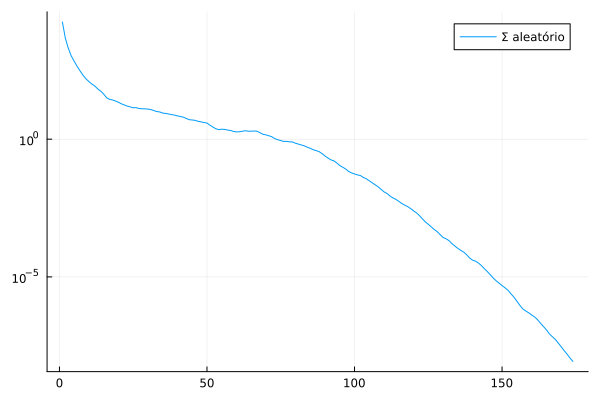

In [14]:
plotar_residuos(infoa, "Σ aleatório")

In [15]:
print("Temos $K autovalores distintos, e o método convergiu em $(infoa.passos) passos. Utilizamos $(round(100*infoa.passos/K))% dos autovalores.")

Temos 625 autovalores distintos, e o método convergiu em 173 passos. Utilizamos 28.0% dos autovalores.

### b) Dez autovalores distintos

In [16]:
Σ = Diagonal([100*j for j=1:10 for i=1:100])

A = Q*Σ*Q'
b = A*ones(1000);

x, infob = GradienteConjugados(A,b,zeros(1000); tol=1e-8);

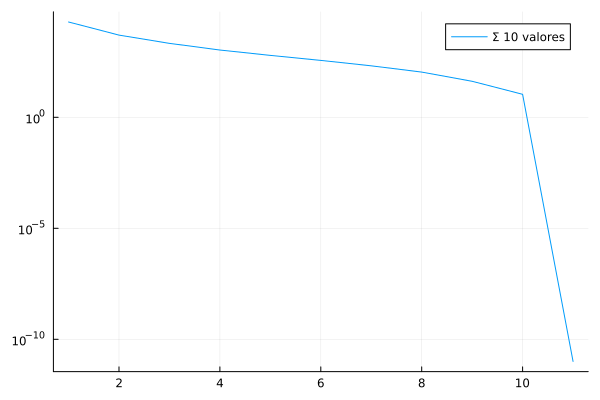

In [ ]:
plotar_residuos(infob, "Σ 10 valores")

In [ ]:
print("Temos 10 autovalores distintos, e o método convergiu em $(infob.passos) passos, como prevê a teoria.")

Temos 10 autovalores distintos, e o método convergiu em 10 passos, como prevê a teoria.

### c) Dois autovalores distintos

In [17]:
Σ = Diagonal([100000^j for j=0:1 for i=1:500])

A = Q*Σ*Q'
b = A*ones(1000);

x, infoc = GradienteConjugados(A,b,zeros(1000); tol=1e-8);

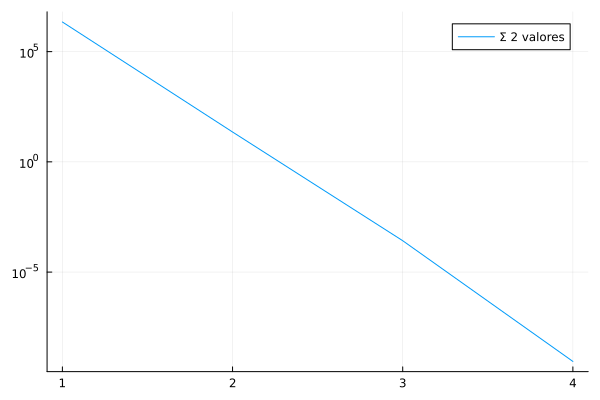

In [ ]:
plotar_residuos(infoc, "Σ 2 valores")

In [ ]:
print("""Temos 2 autovalores distintos, e o método convergiu em $(infoc.passos) passos.
Aqui, o mau condicionamento de A deve ter implicado nessa convergência 'tardia'.""")

Temos 2 autovalores distintos, e o método convergiu em 3 passos. 
Aqui, o mau condicionamento de A deve ter implicado nessa convergência 'tardia'.

## Apêndice: Histórico de implementações Gauss-Seidel


Minha implementação original do passo de Gauss-Seidel, tinha colocado o seguinte código para calcular o somatório $\sum_{j\neq i}A_{ij}x_j$

```julia
function passoGS!(A,b,x)
  m, n = size(A)
  for i=1:n
    # Vamos somar sobre todos os j != i utilizando o operador ternário
    # se j ==i somamos 0, caso contrário somamos Aij*xj
    Σ = 0
    for j=1:m
      Σ += (i==j) ? 0 : A[i,j]*x[j]
    end
    x[i] = (b[i] - Σ)/A[i,i]
  end
end
```

Essa versão estava demorando 280s no caso $n=1000$, uma eternidade.

Foi quando percebi que fazer esse loop sobre todos os $m$ não era ótimo quando a matriz é esparsa.

Por isso, troquei por uma versão vetorial, fazendo o produto da linha $i$ pelo vetor $x$ (que `julia` deve otimizar para o caso esparso) e depois descontando $A_{ii}x_i$.

```julia
function passoGS!(A,b,x)
  m, n = size(A)
  for i=1:n
    Σ = A[i,:]'x
    Σ -= A[i,i]*x[i]
    x[i] = (b[i] - Σ)/A[i,i]
  end
end
```

Essa nova versão tinha dado uma melhorada, estava demorando 108s para o caso $n=1000$.

Mas daí notei que mesmo assim, terei que percorrer todas as entradas de $x$ pra atualizar, mesmo aquelas que não tinham atualização a fazer.

Então voltei à teoria. Utilizando a formulação encontrada na lista 6, temos a atualização seguinte

$$x^{k+1}=x^k + M^{-1}r_k$$

com $r_k = b - Ax_k$. Essa inversa pode até assustar, mas lembrando do splitting
$$A = M - N = (L+D) - (-U)$$
temos que $M=L+D$ é uma triangular inferior, então é só uma retrosubstituição.  

Assim surgiu a versão atual e final, na qual usamos como argumentos apenas a matriz $M$, o vetor de resíduos $r_k$ e o vetor $x_k$.

```julia
function passoGS!(M,r,x)
  y = M\r
  x .= x + y
end

```

Essa versão finalmente foi a campeã, demorando 0,1s para $n=1000$.
